In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install ultralytics

In [3]:
import glob
from PIL import Image
import ultralytics
from ultralytics import YOLO
from IPython.display import display
from glob import glob
import cv2
import random
import os

WARNING  Python>=3.10 is required, but Python==3.9.20 is currently installed 


In [4]:
class Sys:
  epochs=50
  batch_size=32
  seed=6
  learning_rate=0.001
  num_samples=16
  optimizer='Adam'
  data='C:/PSGiTech/imv project/data.yaml'
  samples='C:/PSGiTech/imv project/train/images'

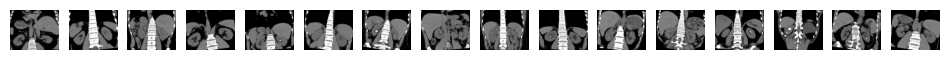

In [5]:
import os
import random
import glob
import matplotlib.pyplot as plt

# Assuming Sys.samples is a path pattern for images
images_for_vis = glob.glob(os.path.join(Sys.samples, '*'))  # Get all files

# Filter out directories
images_for_vis = [f for f in images_for_vis if os.path.isfile(f)]

# Adjust num_samples to not exceed the number of images
num_samples = min(Sys.num_samples, len(images_for_vis))

# Randomly select num_samples images
random_image = random.sample(images_for_vis, num_samples)

plt.figure(figsize=(12, 10))
for i in range(num_samples):
    img = plt.imread(random_image[i])
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [6]:
yolo_v8=YOLO('yolov8m.pt')

In [ ]:
v8_model = yolo_v8.train(data=Sys.data,seed=Sys.seed,epochs=Sys.epochs, lr0=Sys.learning_rate, optimizer=Sys.optimizer, verbose=True,project='ft_models',name='yolo_v8')

New https://pypi.org/project/ultralytics/8.3.23 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.19  Python-3.9.20 torch-2.5.0+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:/PSGiTech/imv project/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v86, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning C:\PSGiTech\imv project\train\labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]
val: Scanning C:\PSGiTech\imv project\valid\labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]

Plotting labels to ft_models\yolo_v86\labels.jpg... 


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to ft_models\yolo_v86
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.127      1.809      1.284         71        640:  53%|█████▎    | 35/66 [44:32<34:56, 67.62s/it]  

In [15]:
def stone_detection(img_path, model):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

In [16]:
df = '/content/test/images'

In [17]:
df_testing = os.listdir(df)

In [18]:
selected_images = random.sample(df_testing, 16)

In [23]:
model_trained = YOLO('/content/ft_models/yolo_v8/weights/best.pt', task='detect')


0: 544x640 4 Tas_Vars, 65.7ms
Speed: 3.3ms preprocess, 65.7ms inference, 2.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 35.1ms
Speed: 3.0ms preprocess, 35.1ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 35.1ms
Speed: 2.9ms preprocess, 35.1ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 29.3ms
Speed: 3.1ms preprocess, 29.3ms inference, 3.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 29.3ms
Speed: 2.7ms preprocess, 29.3ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 29.3ms
Speed: 2.8ms preprocess, 29.3ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 29.3ms
Speed: 2.7ms preprocess, 29.3ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 22.5ms
Speed: 3.1ms preprocess, 22.5ms inference, 1.5ms postprocess per image at sh

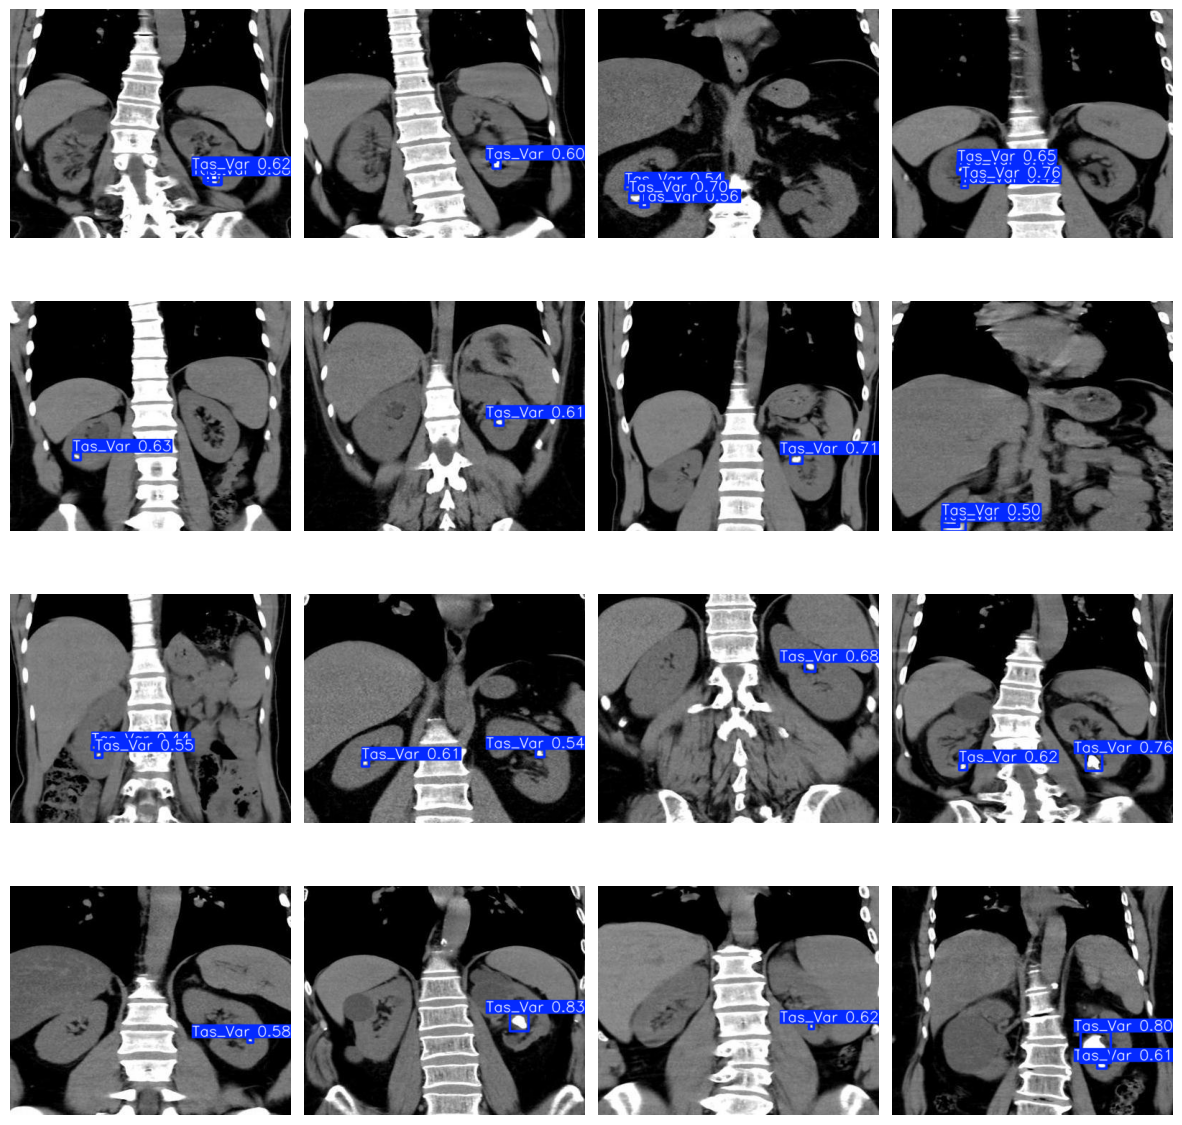

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(df, img_file)
    detect_img = stone_detection(img_path, model_trained)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [25]:
results = pd.read_csv('/content/ft_models/yolo_v8/results.csv')
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,46.4938,2.26125,2.78117,1.34762,0.62026,0.44615,0.48467,0.18046,2.29187,1.76645,1.31740,0.067500,0.000328,0.000328
1,2,85.7613,2.12765,1.23206,1.27699,0.45132,0.47581,0.33202,0.10922,2.19274,1.77417,1.29063,0.034487,0.000649,0.000649
2,3,124.8960,2.17462,1.24113,1.30950,0.65635,0.55242,0.53003,0.18660,2.13026,1.25869,1.24617,0.001461,0.000956,0.000956
3,4,164.3930,2.12912,1.24307,1.31130,0.64914,0.56615,0.56612,0.19151,2.15518,1.36933,1.23282,0.000941,0.000941,0.000941
4,5,203.3060,2.09136,1.19495,1.25834,0.69879,0.56000,0.59372,0.21277,2.19457,1.47135,1.26716,0.000921,0.000921,0.000921
5,6,244.5610,2.09780,1.12656,1.29335,0.60027,0.48053,0.50714,0.20237,2.01462,1.38215,1.19095,0.000901,0.000901,0.000901
6,7,283.2300,2.06253,1.11727,1.25496,0.69252,0.64449,0.64437,0.27395,1.97703,1.04147,1.16907,0.000881,0.000881,0.000881
7,8,322.3580,2.04551,1.10726,1.26825,0.71920,0.63077,0.64950,0.25724,2.07383,1.00190,1.20669,0.000861,0.000861,0.000861
8,9,360.8520,2.05808,1.07095,1.25186,0.69324,0.68000,0.60739,0.24017,2.07425,1.14067,1.21478,0.000842,0.000842,0.000842
9,10,399.7600,2.01333,1.06667,1.23814,0.73955,0.64308,0.69972,0.27389,1.96853,1.07259,1.16823,0.000822,0.000822,0.000822


In [26]:
single_image='/content/valid/images/1-3-46-670589-33-1-63708565633319533700001-5026622760854629227_png_jpg.rf.edd93ead5ac804611605d9495937b75f.jpg'

In [27]:
y = model_trained.predict(single_image)
print(type(y))


image 1/1 /content/valid/images/1-3-46-670589-33-1-63708565633319533700001-5026622760854629227_png_jpg.rf.edd93ead5ac804611605d9495937b75f.jpg: 544x640 1 Tas_Var, 35.5ms
Speed: 4.2ms preprocess, 35.5ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)
<class 'list'>


In [28]:
def show_single_image(img_file, df, model_trained, stone_detection):
    # Load the current image and run object detection
    img_path = os.path.join(df, img_file)
    detect_img = stone_detection(img_path, model_trained)

    # Create a figure and axis for a single image
    fig, ax = plt.subplots(figsize=(5,5))

    # Plot the current image
    ax.imshow(detect_img)
    ax.axis('off')

    plt.show()


0: 544x640 1 Tas_Var, 37.2ms
Speed: 4.2ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)


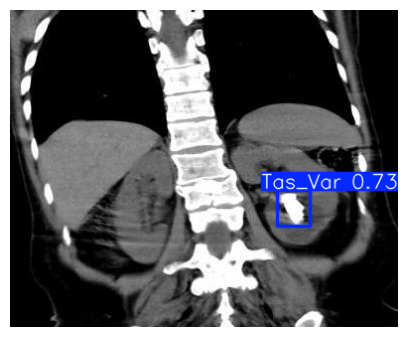

In [29]:
show_single_image(single_image,df,model_trained,stone_detection)